In [120]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [142]:
populations = np.load('saved_runs/03_Schaffers_14_10_parameters_wo_own.npy')
# populations = np.load('saved_runs/01_Schaffers_11_10_parameters.npy')
# populations = np.load('saved_runs/02_Schaffers_14_10_parameters_own_app.npy')

In [133]:
print np.min(populations)
print np.max(populations)
print populations.shape

-5.0
5.0
(588, 100, 10)


In [134]:
n_components=2

pca = PCA(n_components)

populations_pca_3 = np.zeros((0, 100, n_components), np.float64)

for population in populations:
    pca.fit(population)
    population_3d = pca.transform(population)
    populations_pca_3 = np.append(populations_pca_3, np.reshape(population_3d, (1, 100, n_components)), axis=0)

In [135]:
populations_pca_3 = np.insert(populations_pca_3, 2, 0.0, axis=2)

In [136]:
for i in range(populations_pca_3.shape[0]):
    populations_pca_3[i][:, 2] = i 

In [137]:
populations_reshape = np.reshape(populations_pca_3, (populations_pca_3.shape[0]*100, 3))

In [126]:
populations_pca_3.shape

(666, 100, 3)

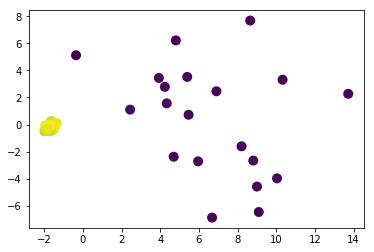

In [138]:
from scipy.stats import gaussian_kde

population_3d = populations_pca_3[20]

x = population_3d[:, 0]
y = population_3d[:, 1]
# z = population_3d[:, 2]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

In [14]:
# TODO: plot the diversity measure over the generations

In [73]:
def test_for_diversity(population):
    
    results = []
    centroid = np.mean(population, axis=0)
    
    for i in range(0, population.shape[0]):
        eucl_dist = np.linalg.norm(centroid-population[i])
        results.append(eucl_dist)

    return sum(results) / len(results)


In [74]:
test_for_diversity(np.asarray([[4, 4, 4], [3, 3, 3], [4, 4, 4]]))

0.7698003589195012

In [143]:
change_in_diversity = []
for i in range(0, 90):
    diversity = test_for_diversity(populations[i])
    change_in_diversity.append(diversity)

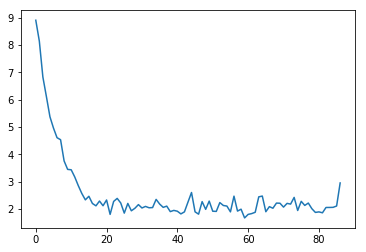

In [81]:
plt.plot(change_in_diversity)
plt.show()

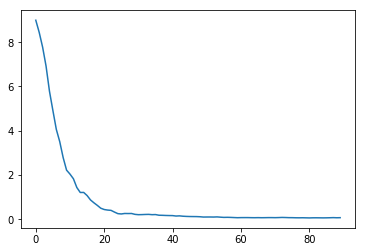

In [144]:
plt.plot(change_in_diversity)
plt.show()